# **Warsaw Rental Prices Regression**

**Due to the size of the dataset the regression models which will be compared will all be simple models from scikit-learn.\
The regressors considered are SVM, single decision tree, regularised, robust and ensemble models.\
Because of transforming and scaling of the data, metrics RMSE and MAE will be normalised. Performance will be compared in both test and train data**

## **Imports,loading data,metrics**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import joblib

In [2]:
file = open("dataset_dict.pickle", "rb")
data = joblib.load(file)
X_train,X_test,y_train,y_test = data.values()

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Function calculating metrics
def metrics(t,p):
    r = np.max(p) - np.min(p)
    rmse = np.sqrt(mean_squared_error(t,p))
    mae = mean_absolute_error(t,p)
    r2 = r2_score(t,p)
    return rmse/r,mae/r,r2

# Function printing metrics for test and train sets
def evaluate(pred,pred_train):
    nrmse,nmae,r2 = metrics(y_train, pred_train)
    print(f'Train data NRMSE: {nrmse}, NMAE: {nmae}, R2: {r2} ')
    nrmse,nmae,r2 = metrics(y_test, pred)
    print(f'Test data NRMSE: {nrmse}, NMAE: {nmae}, R2: {r2} ')

## **Modeling**

In [4]:
from sklearn.svm import SVR
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

### **Benchmark**

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)
evaluate(lr_pred,lr_pred_train)

Train data NRMSE: 0.07154622606837203, NMAE: 0.05422313799709202, R2: 0.793176849405448 
Test data NRMSE: 0.08573931453719036, NMAE: 0.06415912149803221, R2: 0.7791809489998094 


### **SVR**

In [6]:
SVR_rbf = SVR()
SVR_l = SVR(kernel = 'linear')

In [7]:
SVR_rbf.fit(X_train, y_train)
SVR_l.fit(X_train, y_train);

In [8]:
SVR_rbf_pred = SVR_rbf.predict(X_test)
SVR_rbf_pred_train = SVR_rbf.predict(X_train)

SVR_l_pred = SVR_l.predict(X_test)
SVR_l_pred_train = SVR_l.predict(X_train)

In [9]:
evaluate(SVR_rbf_pred,SVR_rbf_pred_train)

Train data NRMSE: 0.06969006820534597, NMAE: 0.048784630262557735, R2: 0.8604514025733531 
Test data NRMSE: 0.09523331508242598, NMAE: 0.07136328559672057, R2: 0.8034559238814616 


In [10]:
evaluate(SVR_l_pred,SVR_l_pred_train)

Train data NRMSE: 0.07590186859827817, NMAE: 0.0565241201511019, R2: 0.7895573403678612 
Test data NRMSE: 0.09119541722317334, NMAE: 0.06787778393483163, R2: 0.776889273381204 


**None of SVR variants performed better than the benchmark**

### **Robust**

In [11]:
ts = TheilSenRegressor(random_state=23)
r = RANSACRegressor(random_state=23)
h = HuberRegressor();

In [12]:
ts.fit(X_train, y_train)
r.fit(X_train, y_train)
h.fit(X_train, y_train);

In [13]:
ts_pred = ts.predict(X_test)
ts_pred_train = ts.predict(X_train)

r_pred = r.predict(X_test)
r_pred_train = r.predict(X_train)

h_pred = h.predict(X_test)
h_pred_train = h.predict(X_train)

In [14]:
evaluate(ts_pred,ts_pred_train)

Train data NRMSE: 0.07363697007449155, NMAE: 0.05579962263644559, R2: 0.7894115628330156 
Test data NRMSE: 0.09221654568131935, NMAE: 0.06935689162497145, R2: 0.7723223458687349 


In [15]:
evaluate(r_pred,r_pred_train)

Train data NRMSE: 0.08533640281426175, NMAE: 0.06412303585450556, R2: 0.7490657580841471 
Test data NRMSE: 0.10483008613496896, NMAE: 0.07909441367793033, R2: 0.734154320136671 


In [16]:
evaluate(h_pred,h_pred_train)

Train data NRMSE: 0.07386342136439912, NMAE: 0.055263338642124835, R2: 0.7913475560743637 
Test data NRMSE: 0.08795251658128507, NMAE: 0.06556017828804872, R2: 0.7771197745711056 


**Only Huber Regression got close to benchmark, but did not surpass it**

### **Regularised**

In [17]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
rcv =  RidgeCV(alphas=alphas , cv=10)
encv = ElasticNetCV(alphas=alphas, cv=10)

In [18]:
rcv.fit(X_train, y_train)
encv.fit(X_train, y_train);

In [19]:
rcv_pred = rcv.predict(X_test)
rcv_pred_train = rcv.predict(X_train)

ecv_pred = encv.predict(X_test)
ecv_pred_train = encv.predict(X_train)

In [20]:
evaluate(rcv_pred,rcv_pred_train)

Train data NRMSE: 0.07205768507230088, NMAE: 0.05461128604329352, R2: 0.7931211738841523 
Test data NRMSE: 0.08618084728097143, NMAE: 0.06444420363025315, R2: 0.7788299848814713 


In [21]:
evaluate(ecv_pred,ecv_pred_train)

Train data NRMSE: 0.07171558079427205, NMAE: 0.0543556302790741, R2: 0.7931662354707083 
Test data NRMSE: 0.08590034539459482, NMAE: 0.06424734362309176, R2: 0.7790174045501457 


**Both did get close, but have not reached the benchmark**

### **Trees**

In [22]:
dt = DecisionTreeRegressor()
rf = RandomForestRegressor(n_estimators=3)
et = ExtraTreesRegressor(n_estimators=3)

In [23]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
et.fit(X_train, y_train);

In [24]:
dt_pred = dt.predict(X_test)
dt_pred_train = dt.predict(X_train)

rf_pred = rf.predict(X_test)
rf_pred_train = rf.predict(X_train)

et_pred = et.predict(X_test)
et_pred_train = et.predict(X_train)

In [25]:
evaluate(dt_pred,dt_pred_train)

Train data NRMSE: 0.009364785989441644, NMAE: 0.0015198175862337633, R2: 0.9961391732612115 
Test data NRMSE: 0.10353997044848451, NMAE: 0.07716169861857766, R2: 0.6149160668851513 


In [26]:
evaluate(rf_pred,rf_pred_train)

Train data NRMSE: 0.04322118173019802, NMAE: 0.02518073785138936, R2: 0.9344955382707257 
Test data NRMSE: 0.0917036032335868, NMAE: 0.06790760079614504, R2: 0.7342178937033337 


In [27]:
evaluate(et_pred,et_pred_train)

Train data NRMSE: 0.009364785989441644, NMAE: 0.0015198175862337659, R2: 0.9961391732612115 
Test data NRMSE: 0.09030261839642001, NMAE: 0.06786478399507241, R2: 0.7153591665812442 


**None of them have surpassed benchmark**

### **Gradiant Boosting**

In [28]:
segb = GradientBoostingRegressor(max_depth = 3)
aegb = GradientBoostingRegressor(loss='lad', max_depth = 3)
hgb = GradientBoostingRegressor(loss='huber', max_depth = 3)

In [29]:
segb.fit(X_train, y_train)
aegb.fit(X_train, y_train)
hgb.fit(X_train, y_train);

In [30]:
segb_pred = segb.predict(X_test)
segb_pred_train = segb.predict(X_train)

aegb_pred = aegb.predict(X_test)
aegb_pred_train = aegb.predict(X_train)

hgb_pred = hgb.predict(X_test)
hgb_pred_train = hgb.predict(X_train)

In [31]:
evaluate(segb_pred,segb_pred_train)

Train data NRMSE: 0.06628975562183403, NMAE: 0.0493707658858643, R2: 0.8463376508914372 
Test data NRMSE: 0.08513313833112172, NMAE: 0.0632917677394307, R2: 0.7982140845049729 


In [32]:
evaluate(aegb_pred,aegb_pred_train)

Train data NRMSE: 0.07655725565986041, NMAE: 0.05447765796517023, R2: 0.8250416174981466 
Test data NRMSE: 0.08456499138814118, NMAE: 0.06274615921575931, R2: 0.7884560568084911 


In [33]:
evaluate(hgb_pred,hgb_pred_train)

Train data NRMSE: 0.06607053123235546, NMAE: 0.04831268221807175, R2: 0.842012203795769 
Test data NRMSE: 0.07982815316332957, NMAE: 0.059537198466178214, R2: 0.8005016220648102 


### **Stochastic Gradiant Boosting**

In [34]:
sgd = SGDRegressor(early_stopping = True)
hsgd = SGDRegressor(loss='huber',early_stopping = True)

In [35]:
sgd.fit(X_train, y_train)
hsgd.fit(X_train, y_train);

In [36]:
sgd_pred = sgd.predict(X_test)
sgd_pred_train = sgd.predict(X_train)

hsgd_pred = hsgd.predict(X_test)
hsgd_pred_train = hsgd.predict(X_train)

In [37]:
evaluate(sgd_pred,sgd_pred_train)

Train data NRMSE: 0.07421627936837659, NMAE: 0.056448392162537796, R2: 0.7901128890223962 
Test data NRMSE: 0.08933931584738268, NMAE: 0.06698071952264564, R2: 0.7731118181059352 


In [38]:
evaluate(hsgd_pred,hsgd_pred_train)

Train data NRMSE: 0.13354019844953927, NMAE: 0.09651969304573581, R2: 0.6793538422416547 
Test data NRMSE: 0.1666406847365237, NMAE: 0.11805609955400553, R2: 0.661477991941668 


**All Gradient Boosting Regressors performed better than the benchmark. The best one one was with the Huber loss function and so, will be tune using simple GridSearchCV**

## **Hyperpatameters Tuning**

**Main goal of tuning this time is to reduce the slight overfitting of the model.\
Parameters which will be tuned:\
a) alpha - Number of samples are considered as outliers. Minimimalization leads to more robust model\
b) n_estimators - Boosting stages for the algorithm. Increasing it could lead to less overfitting.\
c) learning_rate - Contribution of each tree. Decreasing this parameter could reduce overfitting.**

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
parameters = {'alpha' : [0.5,0.6,0.7,0.8,0.9],   
            'n_estimators' : [100,150,200],
            'learning_rate' : [0.01,0.1,0.3],
            'max_depth' : [3],
            'random_state' : [23],
            'loss' : ['huber']} 

In [41]:
grid_cv_gb = GridSearchCV(GradientBoostingRegressor(),parameters, cv=3,n_jobs = -1)
grid_cv_gb.fit(X_train,y_train);

In [42]:
grid_cv_gb.best_params_

{'alpha': 0.9,
 'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 3,
 'n_estimators': 100,
 'random_state': 23}

In [43]:
train_pred = grid_cv_gb.best_estimator_.predict(X_train)
test_pred = grid_cv_gb.best_estimator_.predict(X_test)

In [44]:
evaluate(test_pred,train_pred)

Train data NRMSE: 0.06607053123235546, NMAE: 0.04831268221807175, R2: 0.842012203795769 
Test data NRMSE: 0.07776253323033164, NMAE: 0.058063925138600175, R2: 0.8005948356440638 


**Surprisingly, the default parameters are the best, but setting the random seed improved the model performance.**

## **Feature importance**

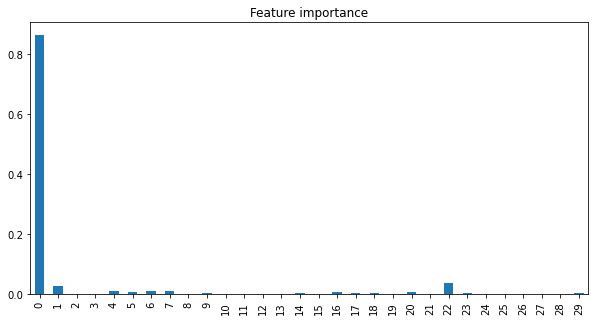

In [45]:
feat_importances = pd.Series(grid_cv_gb.best_estimator_.feature_importances_)
feat_importances.plot(kind='bar',figsize=(10,5),title = 'Feature importance');

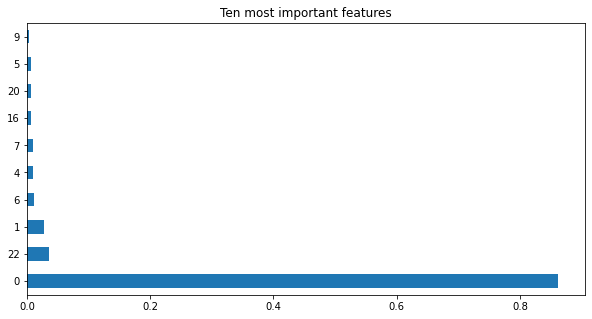

In [46]:
feat_importances.nlargest(10).plot(kind='barh',figsize=(10,5),title = 'Ten most important features');

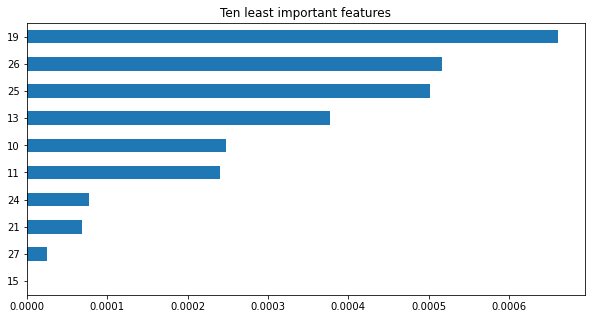

In [47]:
feat_importances.nsmallest(10).plot(kind='barh',figsize=(10,5),title = 'Ten least important features');

**The most important feature is the area, followed by the type of advertiser and whether the apartment is located in Wilanów, except that district features have less impact on the model than other categories.** 

## **Saving model**

In [48]:
import joblib
joblib.dump(grid_cv_gb.best_estimator_, "wr_regressor.pkl")

['wr_regressor.pkl']